**IMPORT BASED LIBRARY AND MOUNT GOOGLE DRIVE**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOAD DATASET**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset_bigdata/aqi_dataset.csv")
southeast_asian_countries = ["Cambodia", "Indonesia", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam", "Laos"]
dataset_asian = dataset[dataset["Country"].isin(southeast_asian_countries)].copy()
dataset_asian

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good,-206.00,1093414.00
43,Philippines,Dipolog,30,Good,1,Good,17,Good,0,Good,30,Good,1450958.00,1233408.00
79,Philippines,Toboso,54,Moderate,1,Good,20,Good,0,Good,54,Moderate,1924007.00,1235167.00
90,Philippines,Jasaan,59,Moderate,1,Good,32,Good,0,Good,59,Moderate,8.65,124.75
94,Philippines,Indang,50,Good,0,Good,24,Good,0,Good,50,Good,45336.00,1208833.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Myanmar,Taungdwingyi,28,Good,0,Good,25,Good,0,Good,28,Good,200017.00,955461.00
16621,Thailand,Chiang Mai,20,Good,0,Good,20,Good,0,Good,20,Good,187953.00,989986.00
16651,Vietnam,Vinh,105,Unhealthy for Sensitive Groups,4,Good,27,Good,6,Good,105,Unhealthy for Sensitive Groups,186667.00,1056667.00
16662,Thailand,Nakhon Si Thammarat,58,Moderate,1,Good,32,Good,0,Good,58,Moderate,900172.00,999631.00


**EDA**


> Melihat negara-negara di Asia Tenggara yang terdapat pada dataset


> Melihat jumlah kota yang terdapat dalam masing-masing negara di Asia Tenggara





In [ ]:
country_counts = dataset_asian.groupby('Country').size()
print("Negara-negara yang ada pada kolom 'Country' dan jumlah valuenya:")
for country, count in country_counts.items():
    print(country + ':', count)


Negara-negara yang ada pada kolom 'Country' dan jumlah valuenya:
Cambodia: 8
Indonesia: 124
Laos: 4
Malaysia: 32
Myanmar: 40
Philippines: 359
Singapore: 1
Thailand: 160
Vietnam: 7


**EDA**
CHECK NULL VALUES


> Melihat apakah ada data kosong di setiap kolom (variabel dataset)

> Apabila terdapat data kosong segera lakukan penanganan (imputasi, remove, dll)






In [ ]:
dataset_asian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 22 to 16678
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             735 non-null    object 
 1   City                735 non-null    object 
 2   AQI Value           735 non-null    int64  
 3   AQI Category        735 non-null    object 
 4   CO AQI Value        735 non-null    int64  
 5   CO AQI Category     735 non-null    object 
 6   Ozone AQI Value     735 non-null    int64  
 7   Ozone AQI Category  735 non-null    object 
 8   NO2 AQI Value       735 non-null    int64  
 9   NO2 AQI Category    735 non-null    object 
 10  PM2.5 AQI Value     735 non-null    int64  
 11  PM2.5 AQI Category  735 non-null    object 
 12  lat                 735 non-null    float64
 13  lng                 735 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 86.1+ KB


**EDA**
CHECK DUPLICATE DATA


> Melihat apakah ada nama kota yang sama didalam suatu dataset. Hal ini harus dilakukan karena dalam suatu negara hanya ada 1 nama kota(unik) tidak boleh lebih


> Apabila ditemukan data duplikasi (terdapat lebih dari 1 nama kota yang sama) harus dilakukan penanganan duplikasi data





In [ ]:
duplicate_cities = dataset_asian[dataset_asian.duplicated('City')]

if len(duplicate_cities) > 0:
    print("Ada duplikat data dalam kolom 'City':")
    print(duplicate_cities)
else:
    print("Tidak ada duplikat data dalam kolom 'City'.")

Ada duplikat data dalam kolom 'City':
           Country         City  AQI Value AQI Category  CO AQI Value  \
264    Philippines        Baras         51     Moderate             1   
426    Philippines       Lucena         32         Good             1   
427    Philippines       Lucena         32         Good             1   
428    Philippines       Lucena         32         Good             1   
1110   Philippines     Claveria         95     Moderate             1   
...            ...          ...        ...          ...           ...   
13498  Philippines       Parang         50         Good             1   
15244  Philippines       Solano         56     Moderate             1   
15906    Indonesia         Palu         50         Good             1   
16102  Philippines  San Narciso         69     Moderate             0   
16390  Philippines    Koronadal         31         Good             1   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
264      

**PREPROCESSING**
HANDLING DUPLICATE DATA


> Penanganan berupa penghapusan seluruh baris data yang memiliki nama kota sama sehingga didapati hasil yang jelas (tidak ambigu)




In [ ]:
dataset_asian_cleaned = dataset_asian.drop_duplicates(subset='City')
dataset_asian_cleaned

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good,-206.00,1093414.00
43,Philippines,Dipolog,30,Good,1,Good,17,Good,0,Good,30,Good,1450958.00,1233408.00
79,Philippines,Toboso,54,Moderate,1,Good,20,Good,0,Good,54,Moderate,1924007.00,1235167.00
90,Philippines,Jasaan,59,Moderate,1,Good,32,Good,0,Good,59,Moderate,8.65,124.75
94,Philippines,Indang,50,Good,0,Good,24,Good,0,Good,50,Good,45336.00,1208833.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Myanmar,Taungdwingyi,28,Good,0,Good,25,Good,0,Good,28,Good,200017.00,955461.00
16621,Thailand,Chiang Mai,20,Good,0,Good,20,Good,0,Good,20,Good,187953.00,989986.00
16651,Vietnam,Vinh,105,Unhealthy for Sensitive Groups,4,Good,27,Good,6,Good,105,Unhealthy for Sensitive Groups,186667.00,1056667.00
16662,Thailand,Nakhon Si Thammarat,58,Moderate,1,Good,32,Good,0,Good,58,Moderate,900172.00,999631.00


In [ ]:
df_clustering = dataset_asian_cleaned
df_clustering

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good,-206.00,1093414.00
43,Philippines,Dipolog,30,Good,1,Good,17,Good,0,Good,30,Good,1450958.00,1233408.00
79,Philippines,Toboso,54,Moderate,1,Good,20,Good,0,Good,54,Moderate,1924007.00,1235167.00
90,Philippines,Jasaan,59,Moderate,1,Good,32,Good,0,Good,59,Moderate,8.65,124.75
94,Philippines,Indang,50,Good,0,Good,24,Good,0,Good,50,Good,45336.00,1208833.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Myanmar,Taungdwingyi,28,Good,0,Good,25,Good,0,Good,28,Good,200017.00,955461.00
16621,Thailand,Chiang Mai,20,Good,0,Good,20,Good,0,Good,20,Good,187953.00,989986.00
16651,Vietnam,Vinh,105,Unhealthy for Sensitive Groups,4,Good,27,Good,6,Good,105,Unhealthy for Sensitive Groups,186667.00,1056667.00
16662,Thailand,Nakhon Si Thammarat,58,Moderate,1,Good,32,Good,0,Good,58,Moderate,900172.00,999631.00


**PREPROCESSING**
ENCODE CATEGORICAL COLOUMN TO NUMERIC


> Proses merubah data kategorikal menjadi numerik untuk melihat korelasi pada heatmap matrix (didalam heatmap harus berupa angka sehingga data kategorikal harus diubah terlebih dahulu)



In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_clustering['AQI Value'] = label_encoder.fit_transform(df_clustering['AQI Value'])
df_clustering['AQI Category'] = label_encoder.fit_transform(df_clustering['AQI Category'])
df_clustering['CO AQI Value'] = label_encoder.fit_transform(df_clustering['CO AQI Value'])
df_clustering['CO AQI Category'] = label_encoder.fit_transform(df_clustering['CO AQI Category'])
df_clustering['Ozone AQI Value'] = label_encoder.fit_transform(df_clustering['Ozone AQI Value'])
df_clustering['Ozone AQI Category'] = label_encoder.fit_transform(df_clustering['Ozone AQI Category'])
df_clustering['NO2 AQI Value'] = label_encoder.fit_transform(df_clustering['NO2 AQI Value'])
df_clustering['NO2 AQI Category'] = label_encoder.fit_transform(df_clustering['NO2 AQI Category'])
df_clustering['PM2.5 AQI Value'] = label_encoder.fit_transform(df_clustering['PM2.5 AQI Value'])
df_clustering['PM2.5 AQI Category'] = label_encoder.fit_transform(df_clustering['PM2.5 AQI Category'])

df_clustering

<ipython-input-116-30ded38eb74d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['AQI Value'] = label_encoder.fit_transform(df_clustering['AQI Value'])
<ipython-input-116-30ded38eb74d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['AQI Category'] = label_encoder.fit_transform(df_clustering['AQI Category'])
<ipython-input-116-30ded38eb74d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,Indonesia,Pontianak,31,0,1,0,12,0,0,0,35,0,-206.00,1093414.00
43,Philippines,Dipolog,17,0,1,0,14,0,0,0,21,0,1450958.00,1233408.00
79,Philippines,Toboso,41,1,1,0,17,0,0,0,45,1,1924007.00,1235167.00
90,Philippines,Jasaan,46,1,1,0,29,0,0,0,50,1,8.65,124.75
94,Philippines,Indang,37,0,0,0,21,0,0,0,41,0,45336.00,1208833.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Myanmar,Taungdwingyi,15,0,0,0,22,0,0,0,19,0,200017.00,955461.00
16621,Thailand,Chiang Mai,7,0,0,0,17,0,0,0,11,0,187953.00,989986.00
16651,Vietnam,Vinh,91,3,4,0,24,0,6,0,95,3,186667.00,1056667.00
16662,Thailand,Nakhon Si Thammarat,45,1,1,0,29,0,0,0,49,1,900172.00,999631.00


**PREPROCESSING**
REMOVE UNRELATED VARIABLES

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clustering_excluded = df_clustering.drop(['City', 'Country'], axis=1)

**EDA**
HEATMAP CORRELATION


> Melihat apakah variabel satu dengan variabel lainnya memiliki korelasi ?


> Mendekati 0 menandakan tidak ada korelasi. Mendekati 1 menandakan korelasi tinggi positive. Mendekati -1 menandakan korelasi tinggi negative





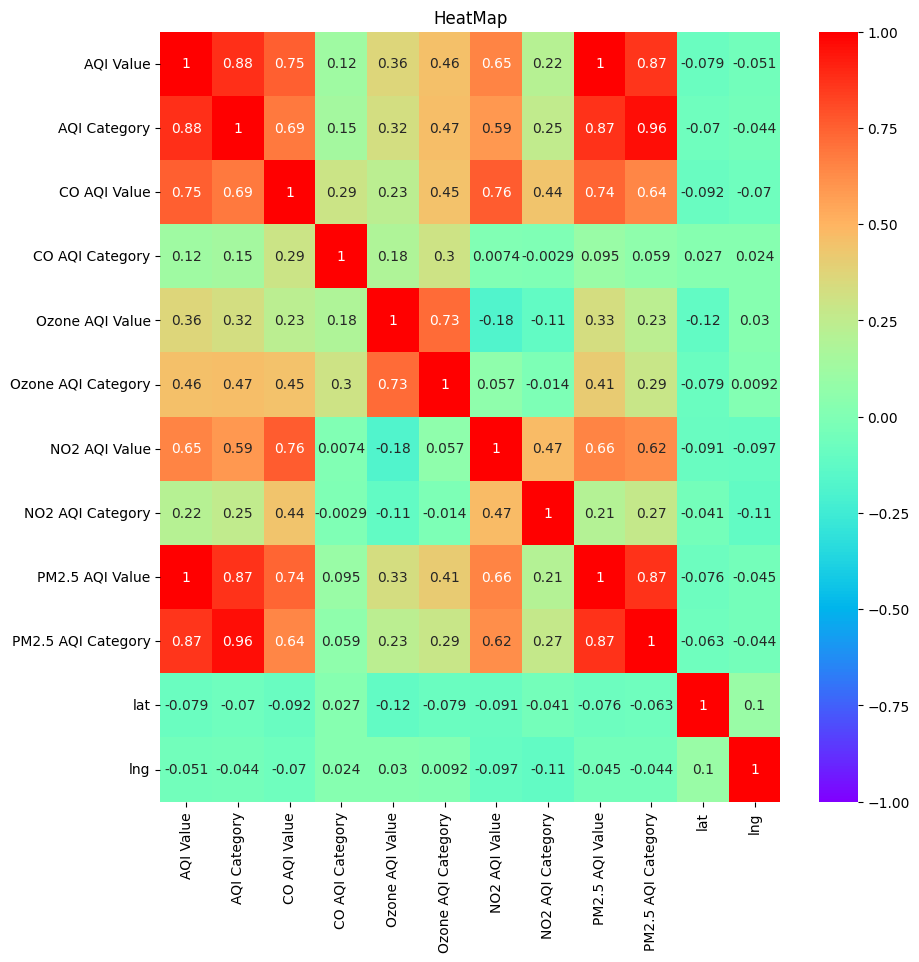

In [ ]:
correlation_matrix = df_clustering_excluded.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', vmin=-1, vmax=1)

plt.title('HeatMap')

plt.show()


**PREPROCESSING**
FEATURE SELECTION


> Berdasarkan heatmap corrrelation dilihat mana variable yang berkorelasi satu sama lain.


> Analisis apakah lebih baik menghapus variable kategori untuk lebih menyeimbangkan clustering? Karena dengan adanya cluster model dengan mudah melihat cluster 0 sampai 4. Apabila dihapus memungkinkan model melihat hanya berdasarkan value value yang ada





In [ ]:
features_for_clustering = ['AQI Value', 'AQI Category', 'CO AQI Value','NO2 AQI Value', 'PM2.5 AQI Value', 'PM2.5 AQI Category']
X = df_clustering[features_for_clustering]
X

,AQI Value,AQI Category,CO AQI Value,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
22,31,0,1,0,35,0
43,17,0,1,0,21,0
79,41,1,1,0,45,1
90,46,1,1,0,50,1
94,37,0,0,0,41,0
...,...,...,...,...,...,...
16608,15,0,0,0,19,0
16621,7,0,0,0,11,0
16651,91,3,4,6,95,3
16662,45,1,1,0,49,1


In [ ]:
!pip install kneed

**MODELLING**
K-MEANS ALGORITHM


> Menggunakan metode Elbow (siku) untuk menentukan jumlah cluster terbaik






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

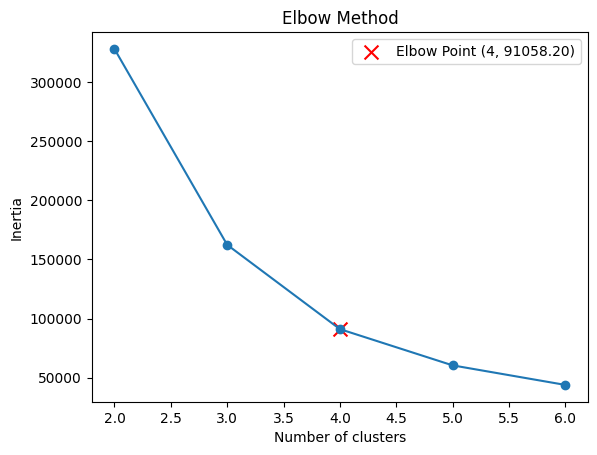

Nilai maksimum dari metode siku (elbow method) adalah: 91058.20 pada jumlah klaster 4


In [ ]:
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

inertia = []
for i in range(2, 7):  # Diganti dari 2 hingga 6
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

kl = KneeLocator(range(2, 7), inertia, curve='convex', direction='decreasing')
elbow_point = kl.elbow

plt.plot(range(2, 7), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.scatter(elbow_point, inertia[elbow_point-2], color='red', marker='x', s=100, label=f'Elbow Point ({elbow_point}, {inertia[elbow_point-2]:.2f})')

plt.legend()
plt.show()

print(f"Nilai maksimum dari metode siku (elbow method) adalah: {inertia[elbow_point-2]:.2f} pada jumlah klaster {elbow_point}")


In [ ]:
kmeans = KMeans(n_clusters=elbow_point, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

**EVALUATION**
SILHOUETTE SCORE


> Berdasarkan tahapan Modelling dan jumlah cluster yang terdapat dari Metode Elbow(siku) lakukan evaluasi untuk melihat nilai maksimum Elbow dan Silhouette Score





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

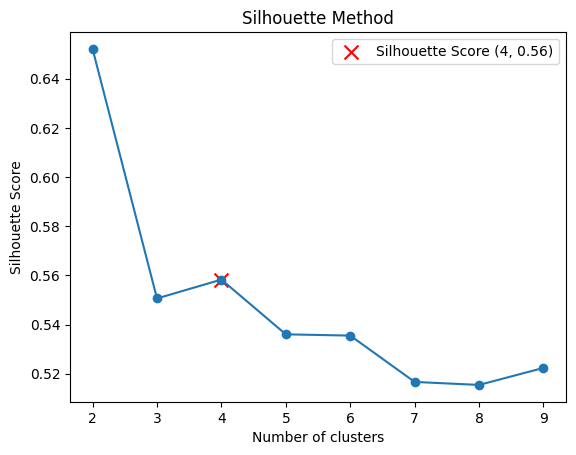

Nilai maksimum dari metode siku (elbow method) adalah: 91058.20 pada jumlah klaster 4
Skor siluet untuk klasterisasi dengan 4 klaster: 0.56


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

inertia = []
silhouette_scores = []  # Initialize silhouette_scores list
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)  # Append silhouette score to the list

kl = KneeLocator(range(2, 10), inertia, curve='convex', direction='decreasing')
elbow_point = kl.elbow

num_clusters = elbow_point

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.scatter(num_clusters, silhouette_avg, color='red', marker='x', s=100, label=f'Silhouette Score ({num_clusters}, {silhouette_avg:.2f})')

plt.legend()
plt.show()

print(f"Nilai maksimum dari metode siku (elbow method) adalah: {inertia[elbow_point-2]:.2f} pada jumlah klaster {elbow_point}")
print(f"Skor siluet untuk klasterisasi dengan {num_clusters} klaster: {silhouette_avg:.2f}")


**EVALUATION**
Visualization Data Points Each Cluster

In [ ]:
cluster_centers = kmeans.cluster_centers_

cluster_ranges = {}

for cluster in range(elbow_point):  # Change 6 to the number of clusters you chose
    cluster_ranges[cluster] = {}
    for feature_index, feature_name in enumerate(features_for_clustering):
        feature_values = X.values[kmeans.labels_ == cluster, feature_index]
        cluster_ranges[cluster][feature_name] = (np.min(feature_values), np.max(feature_values))

for cluster, ranges in cluster_ranges.items():
    print(f"Cluster {cluster} ranges:")
    for feature, (min_val, max_val) in ranges.items():
        print(f"{feature}: {min_val} - {max_val}")
    print()

cluster_counts = {}
for cluster in range(elbow_point):  # Ubah 6 sesuai dengan jumlah cluster yang Anda tetapkan
    cluster_counts[cluster] = np.sum(kmeans.labels_ == cluster)

for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data points")


Cluster 0 ranges:
AQI Value: 30 - 55
AQI Category: 0 - 1
CO AQI Value: 0 - 6
NO2 AQI Value: 0 - 6
PM2.5 AQI Value: 34 - 59
PM2.5 AQI Category: 0 - 1

Cluster 1 ranges:
AQI Value: 91 - 138
AQI Category: 2 - 4
CO AQI Value: 1 - 11
NO2 AQI Value: 0 - 25
PM2.5 AQI Value: 95 - 137
PM2.5 AQI Category: 2 - 4

Cluster 2 ranges:
AQI Value: 56 - 100
AQI Category: 1 - 3
CO AQI Value: 0 - 3
NO2 AQI Value: 0 - 9
PM2.5 AQI Value: 60 - 94
PM2.5 AQI Category: 1 - 3

Cluster 3 ranges:
AQI Value: 0 - 29
AQI Category: 0 - 0
CO AQI Value: 0 - 2
NO2 AQI Value: 0 - 4
PM2.5 AQI Value: 0 - 33
PM2.5 AQI Category: 0 - 0

Cluster 0: 265 data points
Cluster 1: 62 data points
Cluster 2: 115 data points
Cluster 3: 161 data points


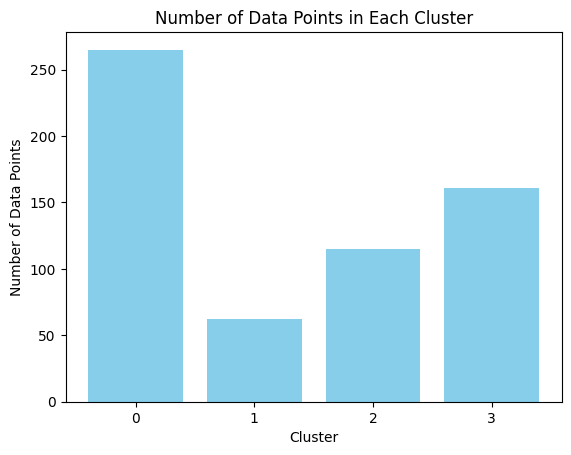

In [ ]:
plt.bar(range(elbow_point), cluster_counts.values(), color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(range(elbow_point))
plt.show()


**Evaluation**
Visualization Principal Components

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


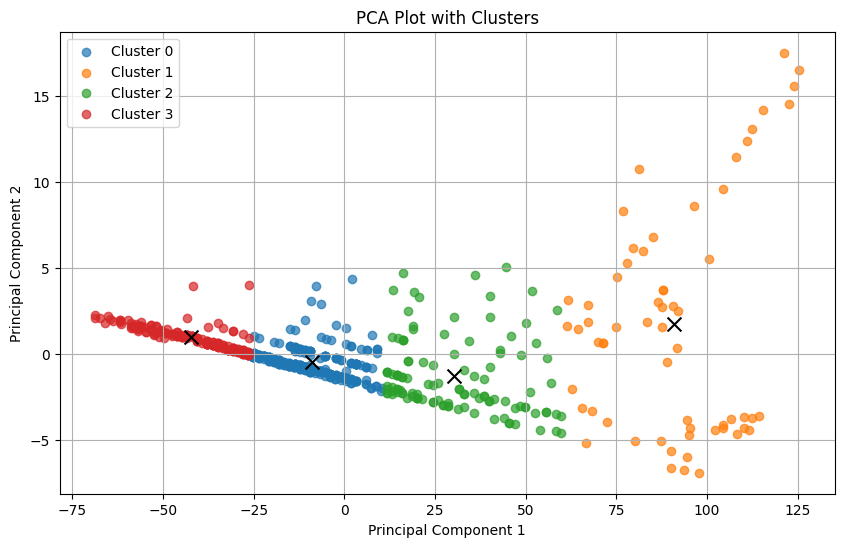

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels_pca

plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['PC1'],
                df_pca[df_pca['Cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}', alpha=0.7)

for center in kmeans_pca.cluster_centers_:
    plt.scatter(center[0], center[1], marker='x', color='black', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Clusters')
plt.legend()
plt.grid(True)
plt.show()
